In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv('./dataset/cell2celltrain.csv')

## 1. 탐색적 데이터 분석(EDA)

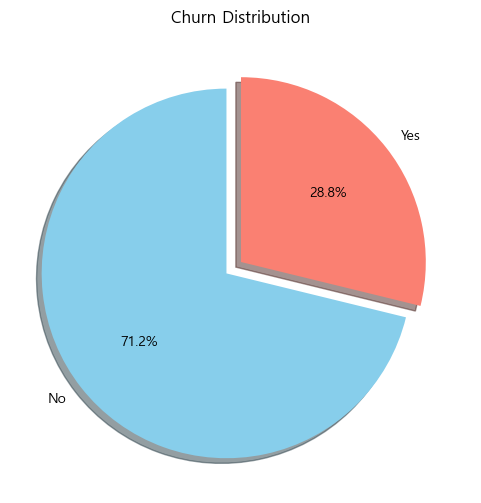

In [201]:
### Target data 분포

churn_counts = data['Churn'].value_counts()

# 시각화 
plt.figure(figsize=(6, 6))
explode = [0.1 if i == churn_counts.idxmax() else 0 for i in churn_counts.index]  
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=['skyblue', 'salmon'], explode=explode, shadow=True)
plt.title('Churn Distribution')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_328\2125827122.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target_variable, y=column, palette="Set3")
C:\Users\User\AppData\Local\Temp\ipykernel_328\2125827122.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target_variable, y=column, palette="Set3")
C:\Users\User\AppData\Local\Temp\ipykernel_328\2125827122.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target_variable, y=column, palette="Set3")
C:\Users\User\AppData\Local\Temp\ipykernel_328

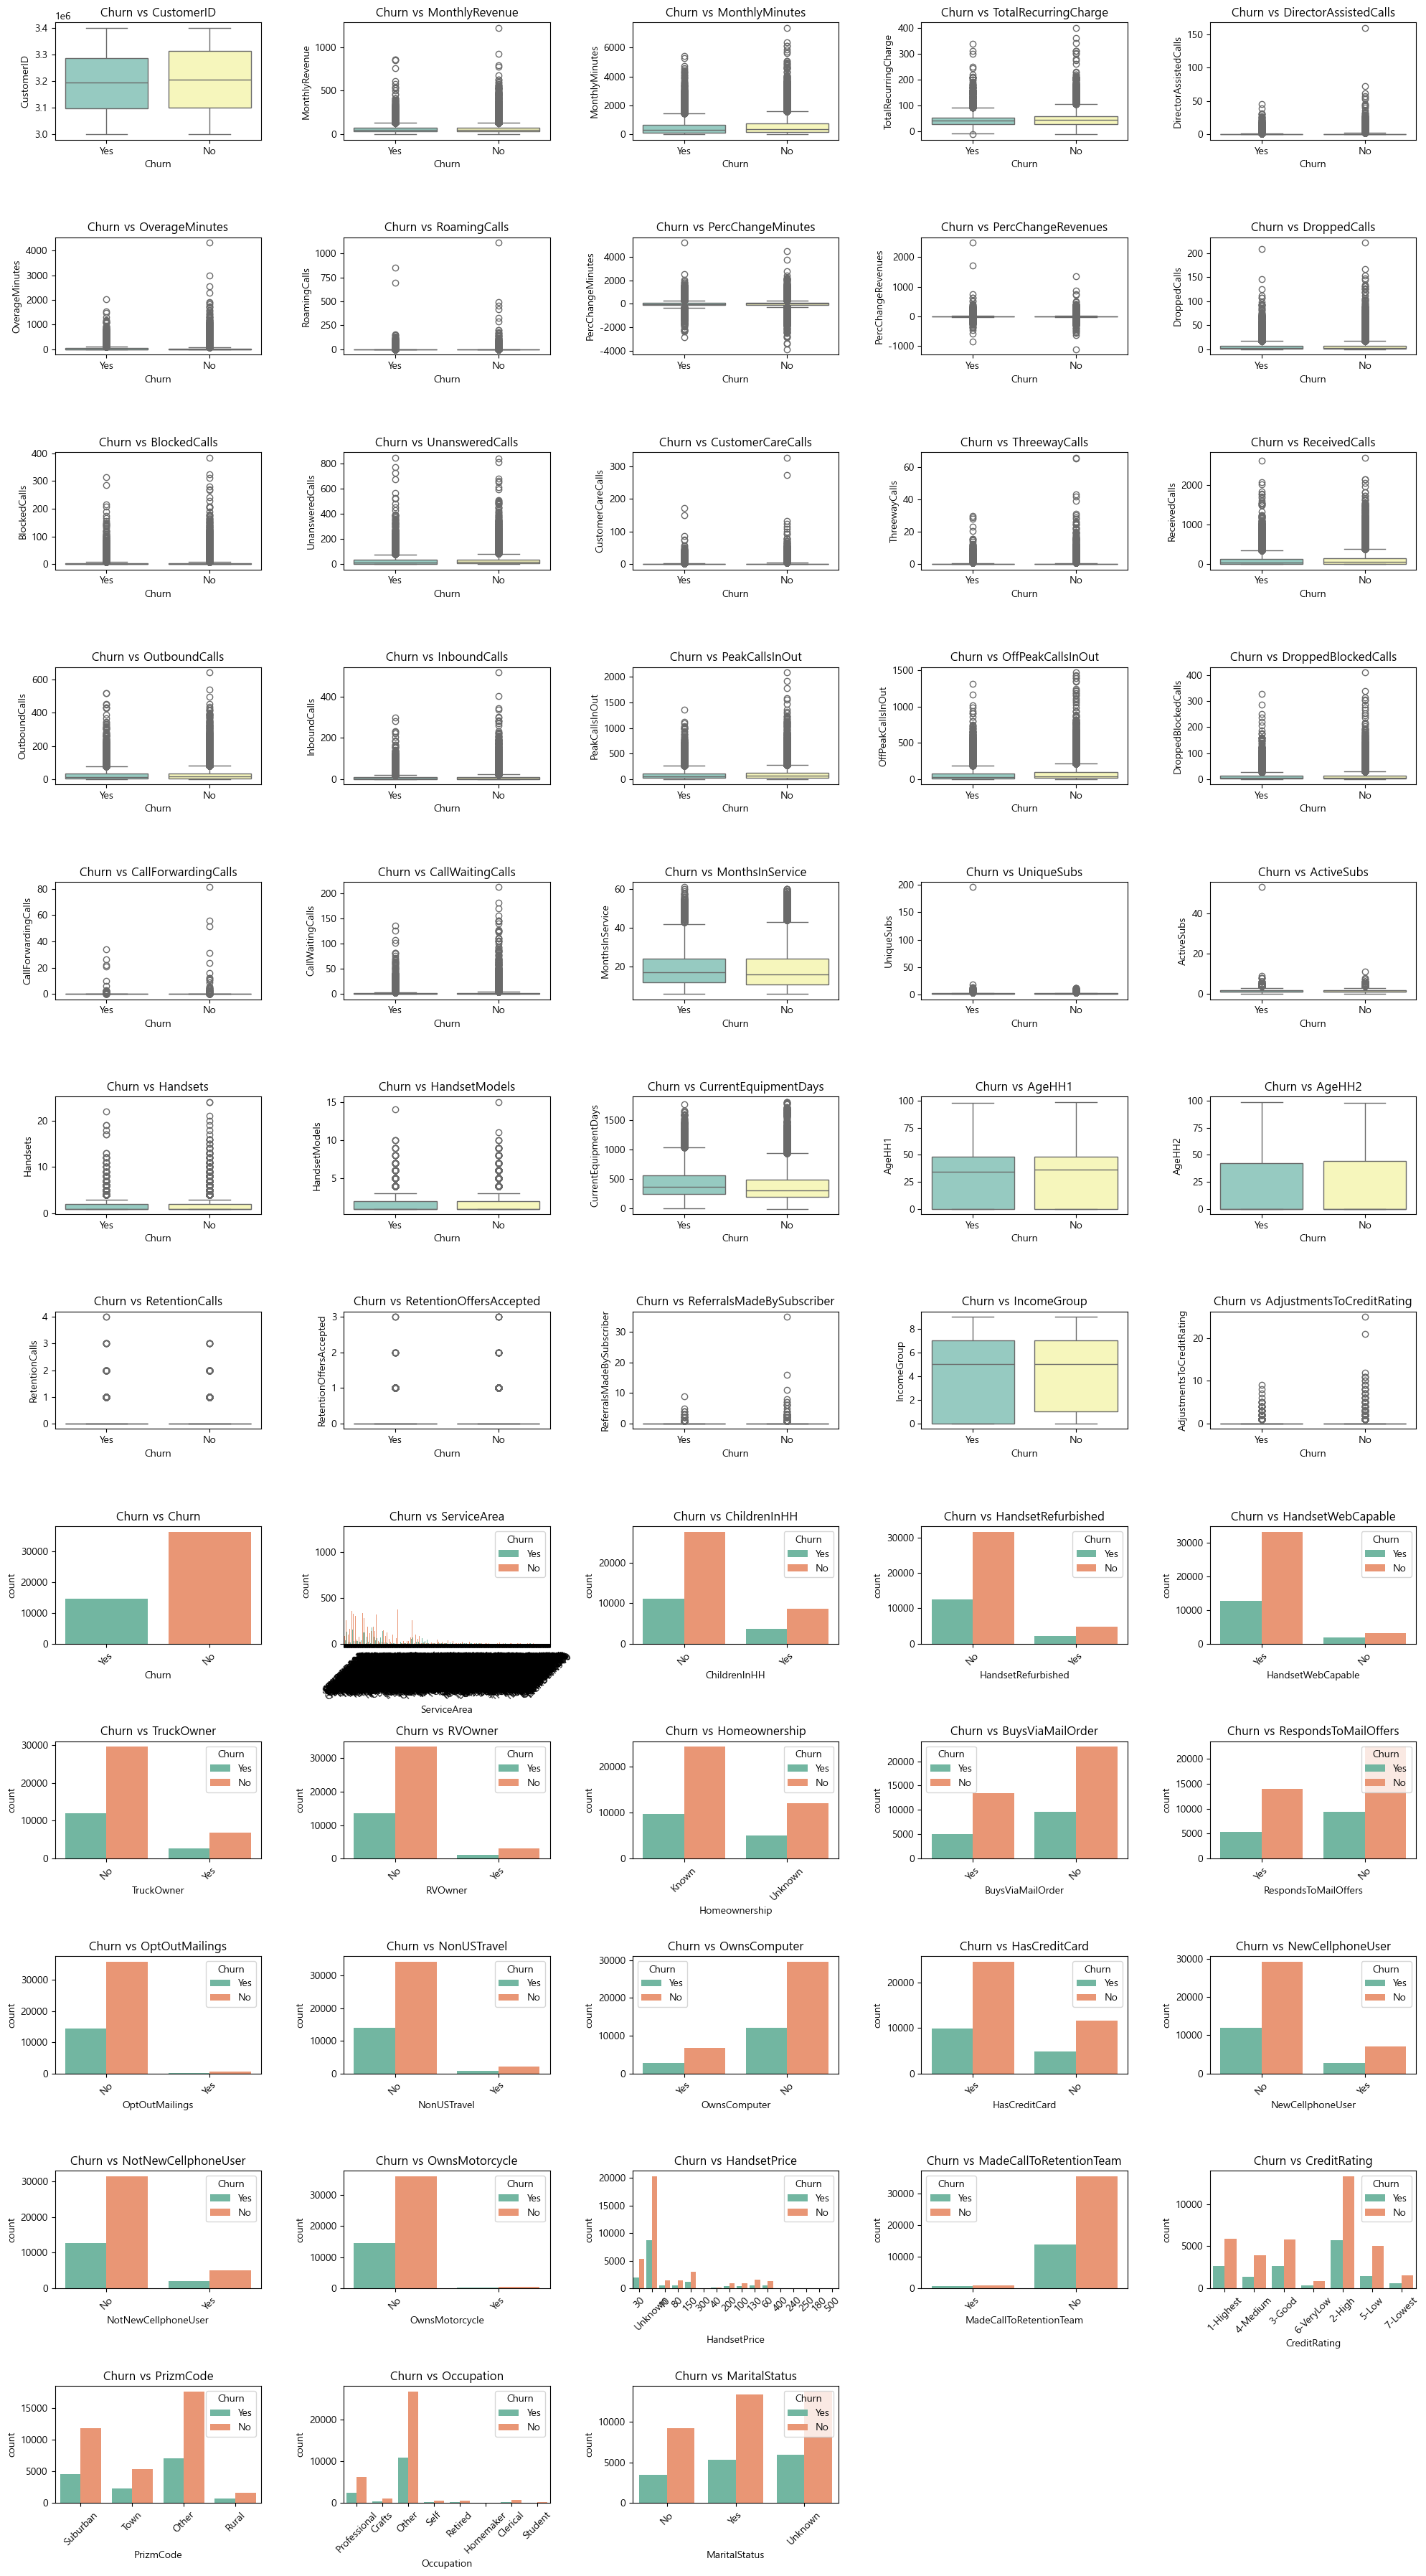

In [202]:
### Feature별 data 분포

# 수치형, 범주형 변수와 타겟 변수 설정 (예: 'Churn'이 타겟 변수일 경우)
target_variable = 'Churn'  # 타겟 변수명을 실제 데이터에 맞게 변경
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns

# 시각화 설정: 한 줄에 5개씩 배치
num_cols = 5
total_plots = len(numerical_features) + len(categorical_features)
num_rows = (total_plots // num_cols) + (1 if total_plots % num_cols != 0 else 0)

plt.figure(figsize=(20, num_rows * 3))

# 수치형 변수에 대한 박스플롯 생성
for i, column in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=data, x=target_variable, y=column, palette="Set3")
    plt.title(f"{target_variable} vs {column}")

# 범주형 변수에 대한 막대그래프 생성
for j, column in enumerate(categorical_features, len(numerical_features) + 1):
    plt.subplot(num_rows, num_cols, j)
    sns.countplot(data=data, x=column, hue=target_variable, palette="Set2")
    plt.title(f"{target_variable} vs {column}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

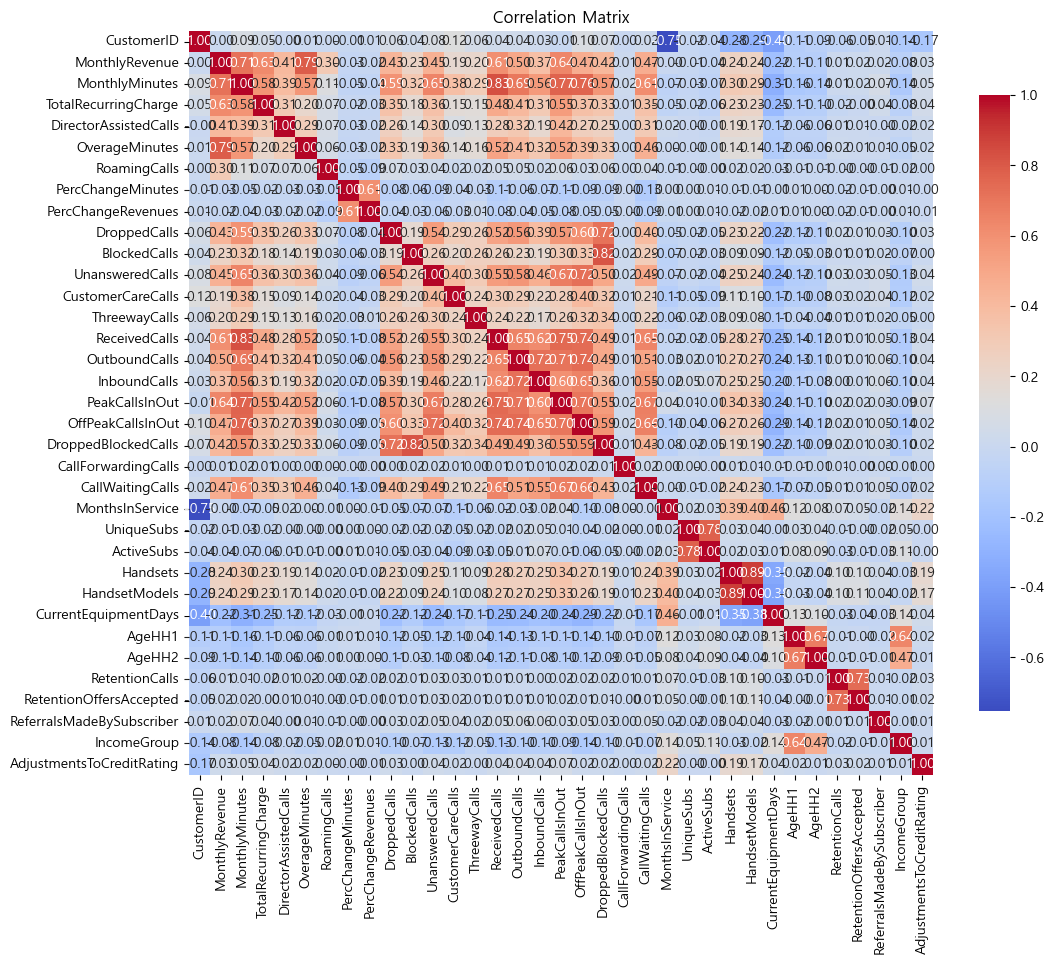

In [203]:
### Heatmap(수치형 데이터)

# 수치형 변수
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# 상관관계 계산
correlation_matrix = numerical_data.corr()

# 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


## 2. 데이터 전처리

### 1. Customer ID 삭제

In [260]:
## Customer ID 삭제
data = data.drop(columns=['CustomerID'])

### 2. feature 선택

In [261]:
## 1. 불균형 : 하나의 값이 95% 이상 
columns_to_drop = []
for column in data.columns:
    # 각 열의 비율 계산
    value_counts = data[column].value_counts(normalize=True)
    max_value_percentage = value_counts.max()
    
    # 95% 이상인 경우 열과 비율 저장
    if max_value_percentage >= 0.95:
        columns_to_drop.append((column, max_value_percentage))

# 드롭할 열 제거
data = data.drop(columns=[col[0] for col in columns_to_drop])

# 드롭한 열과 비율 출력
for col, percent in columns_to_drop:
    print(f"Dropped Column: {col}, Percentage: {percent:.2%}")

Dropped Column: CallForwardingCalls, Percentage: 99.54%
Dropped Column: OptOutMailings, Percentage: 98.53%
Dropped Column: RetentionCalls, Percentage: 96.58%
Dropped Column: RetentionOffersAccepted, Percentage: 98.27%
Dropped Column: ReferralsMadeBySubscriber, Percentage: 95.33%
Dropped Column: OwnsMotorcycle, Percentage: 98.67%
Dropped Column: AdjustmentsToCreditRating, Percentage: 96.40%
Dropped Column: MadeCallToRetentionTeam, Percentage: 96.58%


In [262]:
## 2. 도메인 지식
data = data.drop(columns=['OffPeakCallsInOut','HandsetRefurbished','TruckOwner',
                          'RVOwner','RespondsToMailOffers','OwnsComputer','ThreewayCalls'])

### 3. 결측치 처리

In [263]:
## 1. null 행

# Null 값 개수 확인
null_counts = data.isnull().sum()
null_counts = null_counts[null_counts > 0]  # Null 값이 있는 열만 필터링
print(null_counts)

MonthlyRevenue           156
MonthlyMinutes           156
TotalRecurringCharge     156
DirectorAssistedCalls    156
OverageMinutes           156
RoamingCalls             156
PercChangeMinutes        367
PercChangeRevenues       367
ServiceArea               24
Handsets                   1
HandsetModels              1
CurrentEquipmentDays       1
AgeHH1                   909
AgeHH2                   909
dtype: int64


In [264]:
# null 데이터 행 삭제
data= data.dropna()

In [265]:
## 2. unknown 값

unknown_counts = (data == 'Unknown').sum()
unknown_counts = unknown_counts[unknown_counts > 0]  # 'Unknown' 값이 있는 열만 필터링
print(unknown_counts)

Homeownership    16027
HandsetPrice     28263
MaritalStatus    18649
dtype: int64


In [266]:
# unknown 값을 가진 데이터 열 제거 
data = data.drop(columns=['Homeownership','HandsetPrice','MaritalStatus'])

In [267]:
## 3. 0값

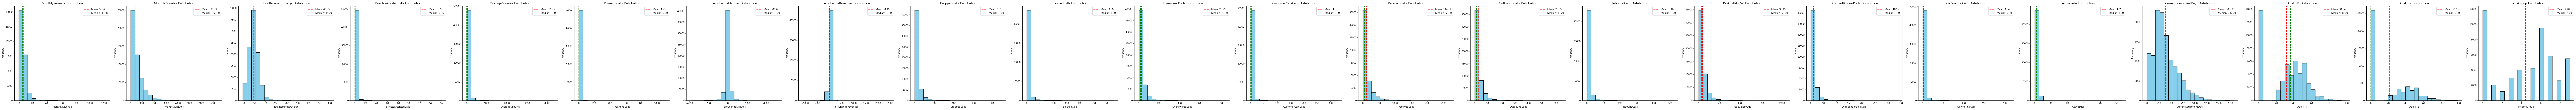

In [268]:
# 0값을 포함하고 있는 열
columns_with_zero = [column for column in data.columns if 0.0 in data[column].value_counts().index]

# 히스토그램 그리기
num_columns = len(columns_with_zero)
fig, axes = plt.subplots(1, num_columns, figsize=(6 * num_columns, 6))

for i, column in enumerate(columns_with_zero):
    # 평균과 중앙값 계산
    mean_value = data[column].mean()
    median_value = data[column].median()

    # 히스토그램 그리기
    ax = axes[i] if num_columns > 1 else axes  # 열이 1개인 경우 처리
    ax.hist(data[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    ax.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.legend()

# 그래프 간 간격 조정 및 출력
plt.tight_layout()
plt.show()

In [269]:
# AgeHH1과 AgeHH2 삭제

data = data.drop(columns=['AgeHH1','AgeHH2'])

## 4. 이상치 처리

In [270]:
## 데이터  변환

In [271]:
print(data.columns)

Index(['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ReceivedCalls',
       'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'DroppedBlockedCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'ChildrenInHH', 'HandsetWebCapable',
       'BuysViaMailOrder', 'NonUSTravel', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'IncomeGroup', 'CreditRating', 'PrizmCode',
       'Occupation'],
      dtype='object')


In [272]:
# 'Churn' 컬럼 변환
data['Churn'] = data['Churn'].replace("Yes", 1)
data['Churn'] = data['Churn'].replace("No", 0)

# 'ServiceArea' 컬럼 변환

region_dict = {
    'East': ['BOS', 'PHI', 'NYC', 'PIT', 'MIA', 'ATL', 'HAR', 'NSH', 'NCR', 'NNY'],
    'Center': ['CHI', 'DET', 'STL', 'DAL', 'HOU', 'KCY', 'OMA', 'IND', 'INH', 'IPM', 'AWI', 'FLN', 'OHI', 'OHH'],
    'West': ['LAX', 'SFR', 'SEA', 'SAN', 'PHX', 'DEN', 'SLC', 'LAU', 'NEV', 'NMC', 'NMX', 'NVU', 'HWI', 'SHE', 'SDA', 'SEW', 'SFU', 'SLU']
    }

def map_region(service_area):
    txt = service_area[:3]
    for region, cities in region_dict.items():
        if txt in [city[:3] for city in cities]:
            return region
            
data['ServiceArea'] = data['ServiceArea'].apply(map_region)

# 'CreditRating' 컬럼 변환

data['CreditRating'] = data['CreditRating'].replace({
        "1-Highest": 1, "2-High": 2, "3-Good": 3,
        "4-Medium": 4, "5-Low": 5, "6-VeryLow": 6,
        "7-Lowest": 7
    })

C:\Users\User\AppData\Local\Temp\ipykernel_328\1668832294.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Churn'] = data['Churn'].replace("No", 0)
C:\Users\User\AppData\Local\Temp\ipykernel_328\1668832294.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['CreditRating'] = data['CreditRating'].replace({


In [284]:
#수치형/범주형 분리

import numpy as np

# 남아 있는 열 
remaining_columns = data.columns.tolist()

# 남아 있는 열을 범주형과 수치형으로 나누기
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col != 'Churn']
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nNumerical Features:")
print(numerical_features)

print("\nCategorical Features:")
print(categorical_features)


Numerical Features:
['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'DroppedBlockedCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'IncomeGroup', 'CreditRating']

Categorical Features:
['ServiceArea', 'ChildrenInHH', 'HandsetWebCapable', 'BuysViaMailOrder', 'NonUSTravel', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'PrizmCode', 'Occupation']


In [274]:
## 이상치 처리 (수치형 데이터)

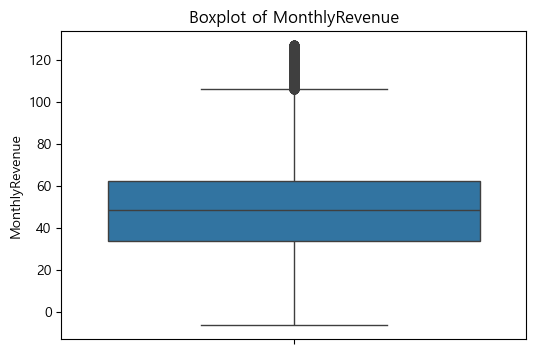

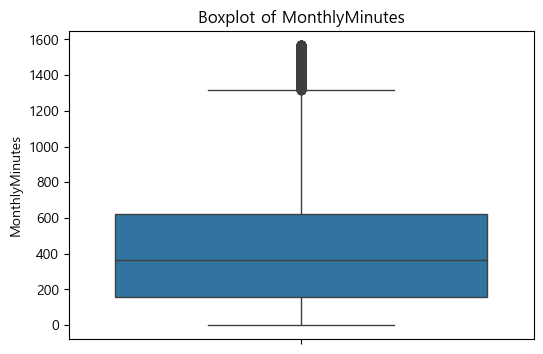

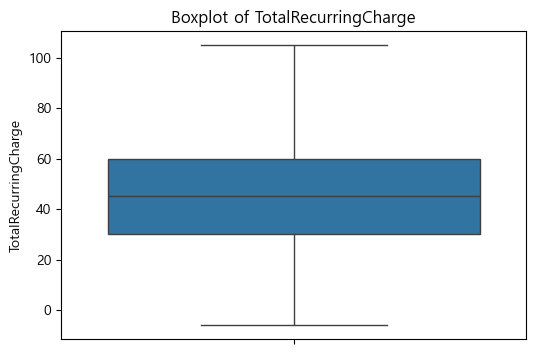

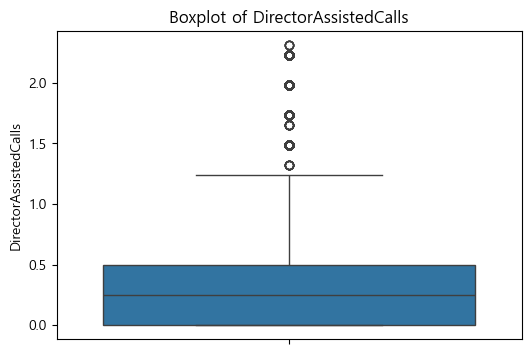

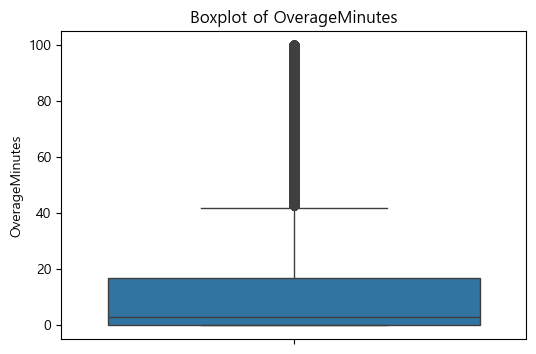

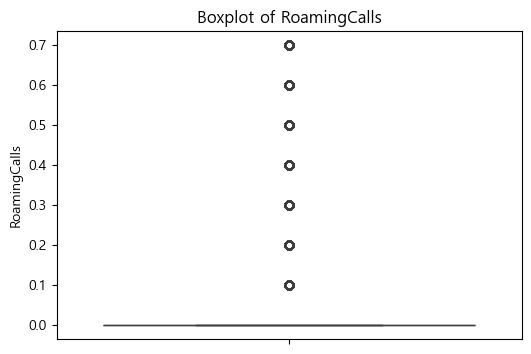

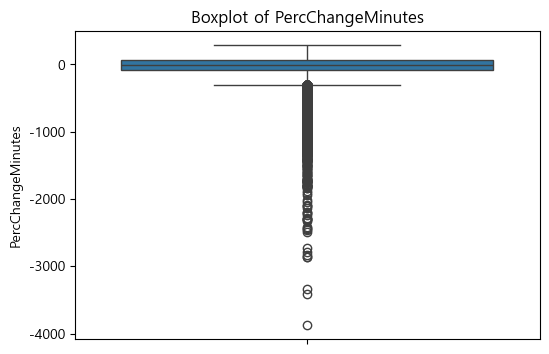

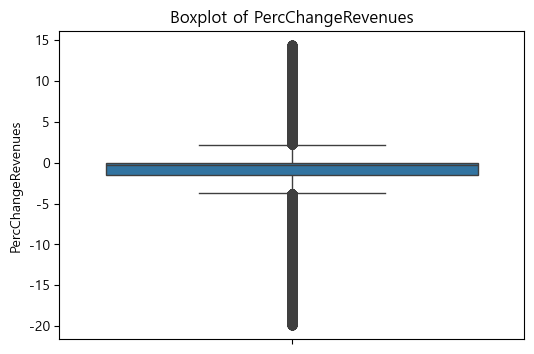

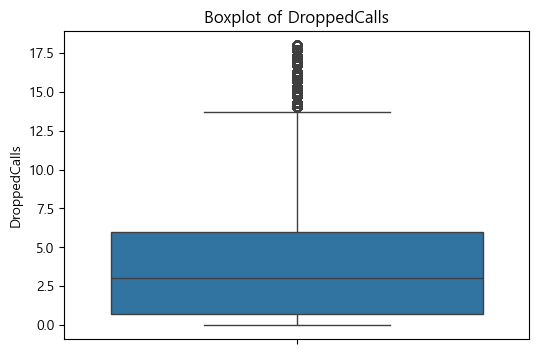

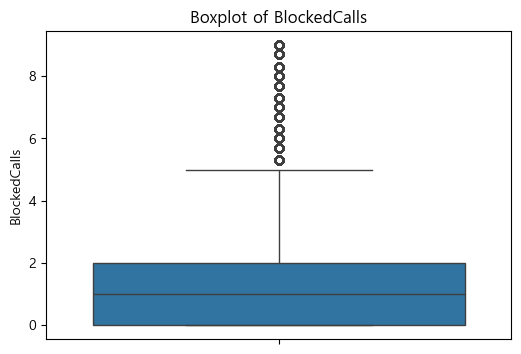

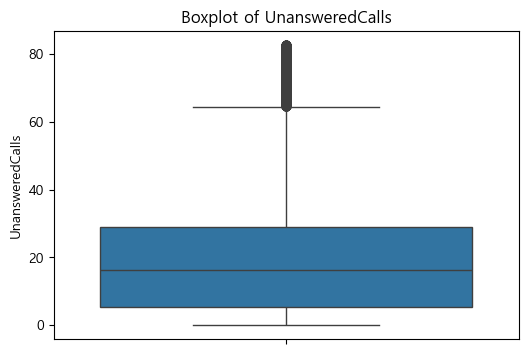

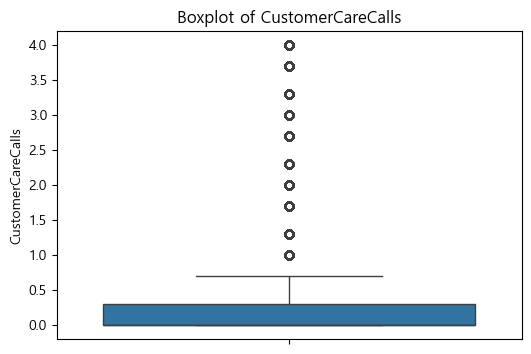

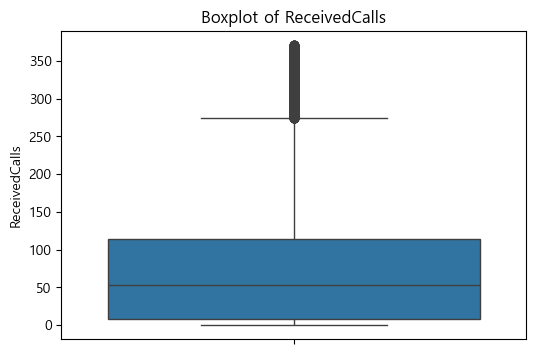

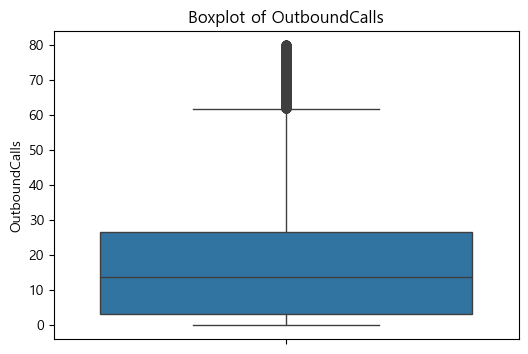

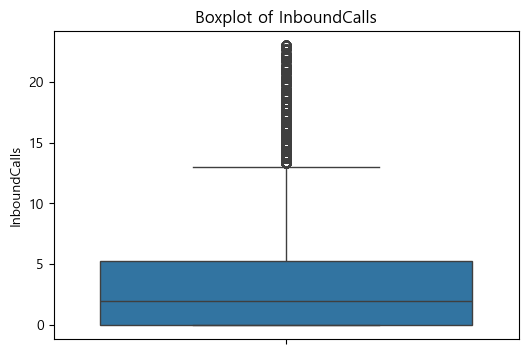

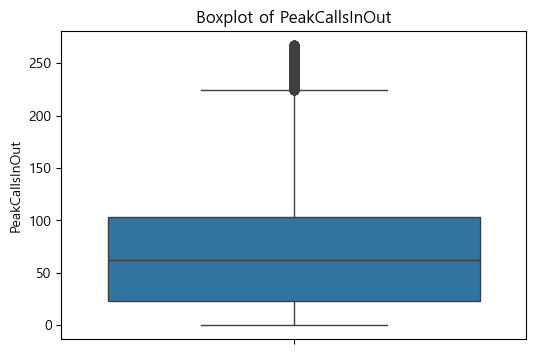

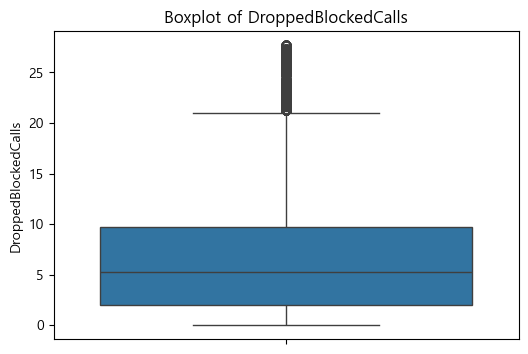

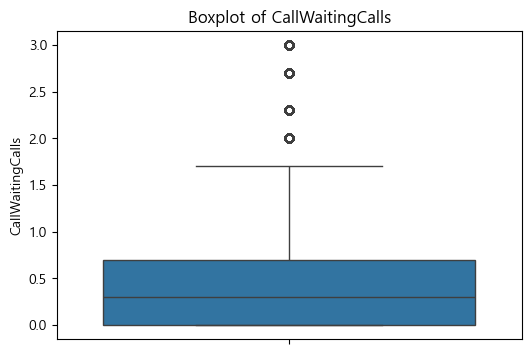

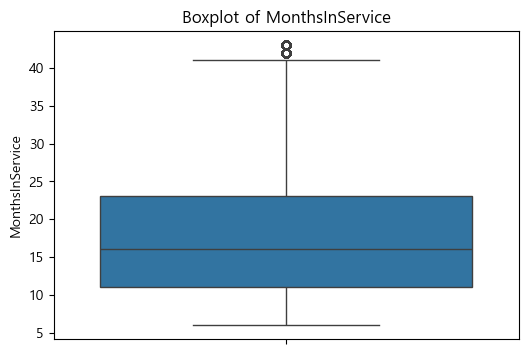

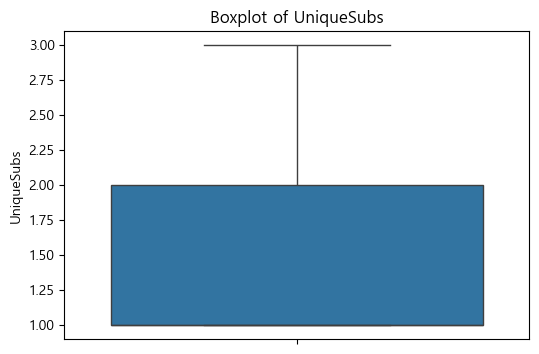

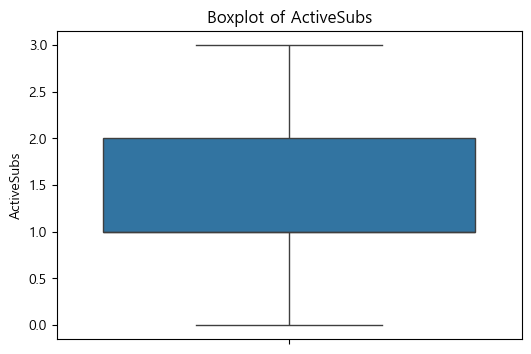

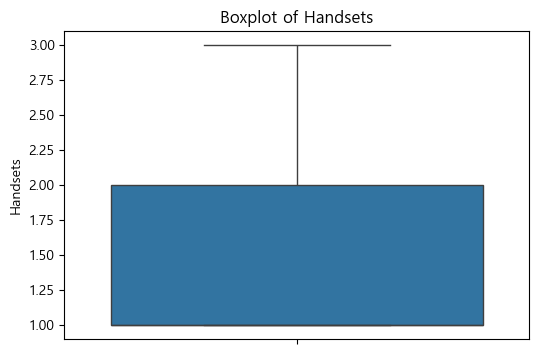

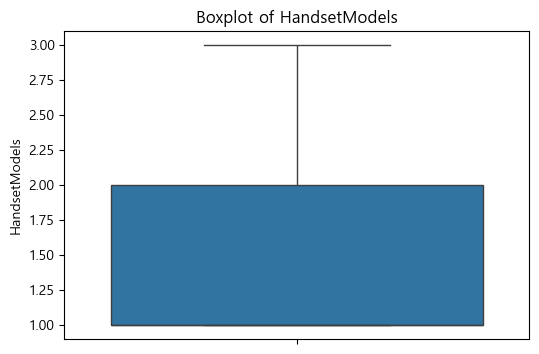

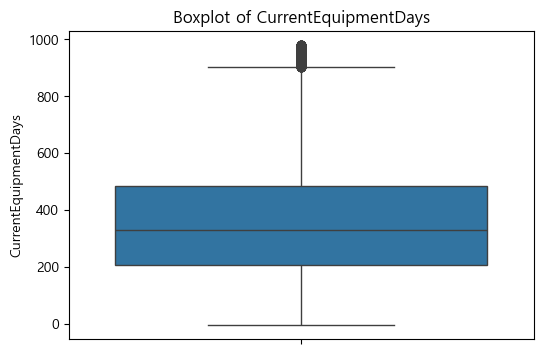

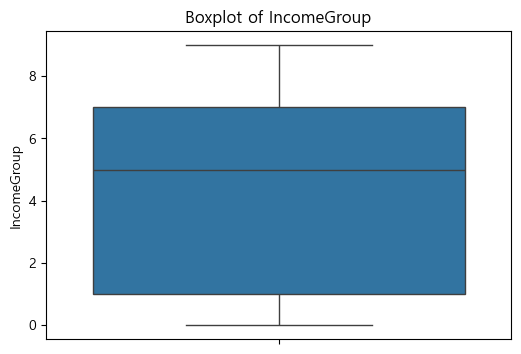

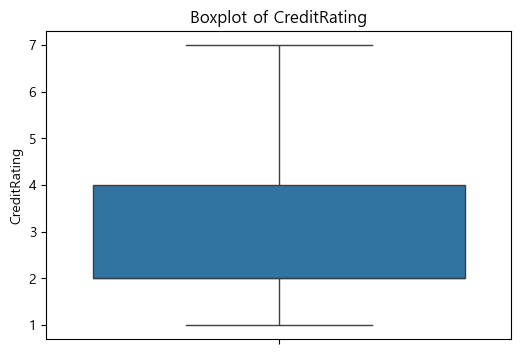

Median Replacement: ['MonthlyMinutes', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'DroppedBlockedCalls', 'CallWaitingCalls', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels']
IQR Replacement: ['MonthlyRevenue', 'TotalRecurringCharge', 'MonthsInService', 'CurrentEquipmentDays', 'IncomeGroup', 'CreditRating']
Q1 and Q3 Replacement: []
Upper Bound Replacement: ['PercChangeRevenues']
Lower Bound Replacement: []


In [288]:
# Initialize groups
median_group = []
iqr_group = []
q1_q3_group = []
upper_bound_group = []
lower_bound_group = []

# Analyze each column's distribution
for column in numerical_features:
    if column in data.columns:
        # Summary statistics
        col_data = data[column].dropna()
        q1 = col_data.quantile(0.25)
        q3 = col_data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 2.0 * iqr
        upper_bound = q3 + 2.0 * iqr

        # Plotting the boxplot for visualization
        plt.figure(figsize=(6, 4))
        sns.boxplot(col_data)
        plt.title(f"Boxplot of {column}")
        plt.show()

        # Decision based on distribution
        if col_data.skew() > 1 or col_data.skew() < -1:
            median_group.append(column)
        elif col_data.between(lower_bound, upper_bound).mean() > 0.95:
            iqr_group.append(column)
        elif col_data.between(q1, q3).mean() > 0.75:
            q1_q3_group.append(column)
        elif col_data.max() > upper_bound:
            upper_bound_group.append(column)
        elif col_data.min() < lower_bound:
            lower_bound_group.append(column)

# Display grouped results
print("Median Replacement:", median_group)
print("IQR Replacement:", iqr_group)
print("Q1 and Q3 Replacement:", q1_q3_group)
print("Upper Bound Replacement:", upper_bound_group)
print("Lower Bound Replacement:", lower_bound_group)

In [289]:
## 이상치 처리

# Median Replacement
for column in median_group:
    median = data[column].median()
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), median, data[column])

# IQR Replacement
for column in iqr_group:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 2.0 * IQR
    upper_bound = q3 + 2.0 * IQR
    data[column] = np.where(data[column] < lower_bound, q1, data[column])
    data[column] = np.where(data[column] > upper_bound, q3, data[column])

# Upper Bound Replacement
for column in upper_bound_group:
    q3 = data[column].quantile(0.75)
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    upper_bound = q3 + 1.5 * IQR
    data[column] = np.where(data[column] > upper_bound, q3, data[column])


In [290]:
## 이상치 처리 (범주형 데이터)

In [293]:
# 최빈값 칼럼 판단
threshold = 0.05 
columns_mode_replace = []

for column in categorical_features:
    value_counts = data[column].value_counts(normalize=True)
    min_percentage = value_counts.min()
    if min_percentage < threshold:
        columns_mode_replace.append(column)
        print(f"Column: {column}, Min Percentage: {min_percentage:.2%}")

print("\nColumns recommended for Mode Replacement:")
print(columns_mode_replace)

Column: PrizmCode, Min Percentage: 4.80%
Column: Occupation, Min Percentage: 0.32%

Columns recommended for Mode Replacement:
['PrizmCode', 'Occupation']


In [296]:
# 최빈값 대체
for column in columns_mode_replace:
    mode_value = data[column].mode()[0] 
    value_counts = data[column].value_counts(normalize=True)
    rare_values = value_counts[value_counts < 0.05].index  

    # 5% 미만의 값을 최빈값으로 대체
    data[column] = data[column].replace(rare_values, mode_value)

## 5. 원-핫 인코딩

In [297]:
# 고유값 개수 
unique_counts = data.nunique()

# 결과
for column, count in unique_counts.items():
    print(f"Column: {column}, Unique Values: {count}")

Column: Churn, Unique Values: 2
Column: MonthlyRevenue, Unique Values: 9653
Column: MonthlyMinutes, Unique Values: 1319
Column: TotalRecurringCharge, Unique Values: 110
Column: DirectorAssistedCalls, Unique Values: 8
Column: OverageMinutes, Unique Values: 43
Column: RoamingCalls, Unique Values: 1
Column: PercChangeMinutes, Unique Values: 593
Column: PercChangeRevenues, Unique Values: 222
Column: DroppedCalls, Unique Values: 42
Column: BlockedCalls, Unique Values: 16
Column: UnansweredCalls, Unique Values: 194
Column: CustomerCareCalls, Unique Values: 3
Column: ReceivedCalls, Unique Values: 2734
Column: OutboundCalls, Unique Values: 186
Column: InboundCalls, Unique Values: 40
Column: PeakCallsInOut, Unique Values: 674
Column: DroppedBlockedCalls, Unique Values: 64
Column: CallWaitingCalls, Unique Values: 6
Column: MonthsInService, Unique Values: 38
Column: UniqueSubs, Unique Values: 3
Column: ActiveSubs, Unique Values: 4
Column: ServiceArea, Unique Values: 3
Column: Handsets, Unique Val

In [301]:
# 원-핫 인코딩 적용 여부 판단
threshold = 10  
columns_onehot = []  

for column in categorical_features:
    unique_count = data[column].nunique()
    if unique_count <= threshold:
        columns_onehot.append(column)
        
data = pd.get_dummies(data, columns=columns_onehot)
    
# 결과 출력
print(columns_onehot)

['ServiceArea', 'ChildrenInHH', 'HandsetWebCapable', 'BuysViaMailOrder', 'NonUSTravel', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'PrizmCode', 'Occupation']


In [304]:
# 저장할 파일 경로 지정
output_file_path = './dataset/train_result.csv'  # 원하는 경로로 변경

# 전처리된 데이터를 지정한 경로에 저장
data.to_csv(output_file_path, index=False)
print("Successfully saved as 'train_result.csv'.")

Successfully saved as 'train_result.csv'.
